In [1]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques

In [2]:
# from zipfile import ZipFile

In [3]:
# with ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zipObj:
#    zipObj.extractall()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme()

In [6]:
train_df = pd.read_csv('./train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures

In [10]:
test_df = pd.read_csv('./test.csv')

In [11]:
column_greater_700_nulls = train_df.isna().sum() > 700
column_greater_700_nulls_test = test_df.isna().sum() > 700
cols_to_del = set()
for index, value in column_greater_700_nulls.items():
    if value:
        cols_to_del.add(index)
for index, value in column_greater_700_nulls_test.items():
    if value:
        cols_to_del.add(index)
        
columns_isna = (train_df.isna().sum() != 0) & (train_df.isna().sum() <= 700)
columns_isna_test = (test_df.isna().sum() != 0) & (test_df.isna().sum() <= 700)
cols_na = set()
for index, value in columns_isna.items():
    if value:
        cols_na.add(index)
for index, value in columns_isna_test.items():
    if value:
        cols_na.add(index)
cols_na = cols_na.difference(cols_to_del)
        
cat_cols = set()
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        cat_cols.add(col)

In [12]:
train_df_mean = {}
train_df_mode = {}
train_df_median = {}
cols_to_del_2 = set()
cols_to_del_3 = set()

for col in cols_na:
    if train_df[col].dtype == 'float64':
        train_df_mean[col] = train_df[col].mean()
    elif train_df[col].dtype == 'object':
        train_df_mode[col] = train_df[col].mode()[0]
    elif train_df[col].dtype == 'int64':
        train_df_median[col] = train_df[col].median()

cols_const = DropConstantFeatures(tol=0.99, variables=None)
cols_dupl = DropDuplicateFeatures(variables=None)
cols_corr = DropCorrelatedFeatures(threshold=0.85, method='pearson')

In [13]:
"""
1 - drop > 700
2 - fillna
3 - get dummies
4 - drop
"""
def clean_data(df, test=False):
    global cols_to_del, cat_cols, train_df_mean, train_df_mode, cols_const, cols_dupl, cols_corr, cols_to_del_2, cols_to_del_3
    df.drop(columns=['Id'], inplace=True, axis=1)
    df.drop(columns=cols_to_del, inplace=True, axis=1)
    for col in train_df_mean:
        df[col].fillna(train_df_mean[col], inplace=True)
    for col in train_df_mode:
        df[col].fillna(train_df_mode[col], inplace=True)
    for col in train_df_median:
        df[col].fillna(train_df_median[col], inplace=True)
    df = pd.get_dummies(df, drop_first=True)
    if not test:
        cols_const.fit(df)
        cols_to_del_2 = cols_to_del_2.union(cols_const.features_to_drop_)
        cols_dupl.fit(df)
        cols_to_del_2 = cols_to_del_2.union(cols_dupl.features_to_drop_)
        cols_corr.fit(df)
        cols_to_del_2 = cols_to_del_2.union(cols_corr.features_to_drop_)
    if test:
        for col in cols_to_del_2:
            if col in df.columns:
                cols_to_del_3.add(col)
    df.drop(columns=cols_to_del_3, inplace=True, axis=1)
    return df

In [14]:
train_df = clean_data(train_df)
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,1,0,0,0,1,0


# EDA

<AxesSubplot:title={'center':'Distribution of SalePrice'}, xlabel='SalePrice', ylabel='Count'>

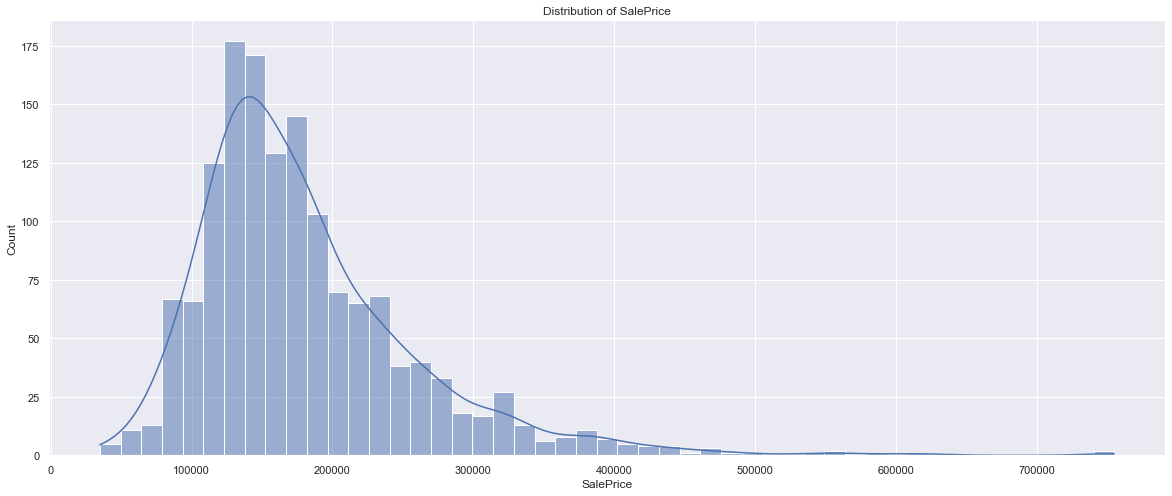

In [15]:
plt.figure(figsize=(20,8))
plt.title('Distribution of SalePrice')
sns.histplot(train_df, x='SalePrice', kde=True)

In [16]:
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
MasVnrType_None    -0.367456
BsmtQual_TA        -0.498545
GarageFinish_Unf   -0.513906
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 233, dtype: float64

<AxesSubplot:title={'center':'Correlation between columns'}>

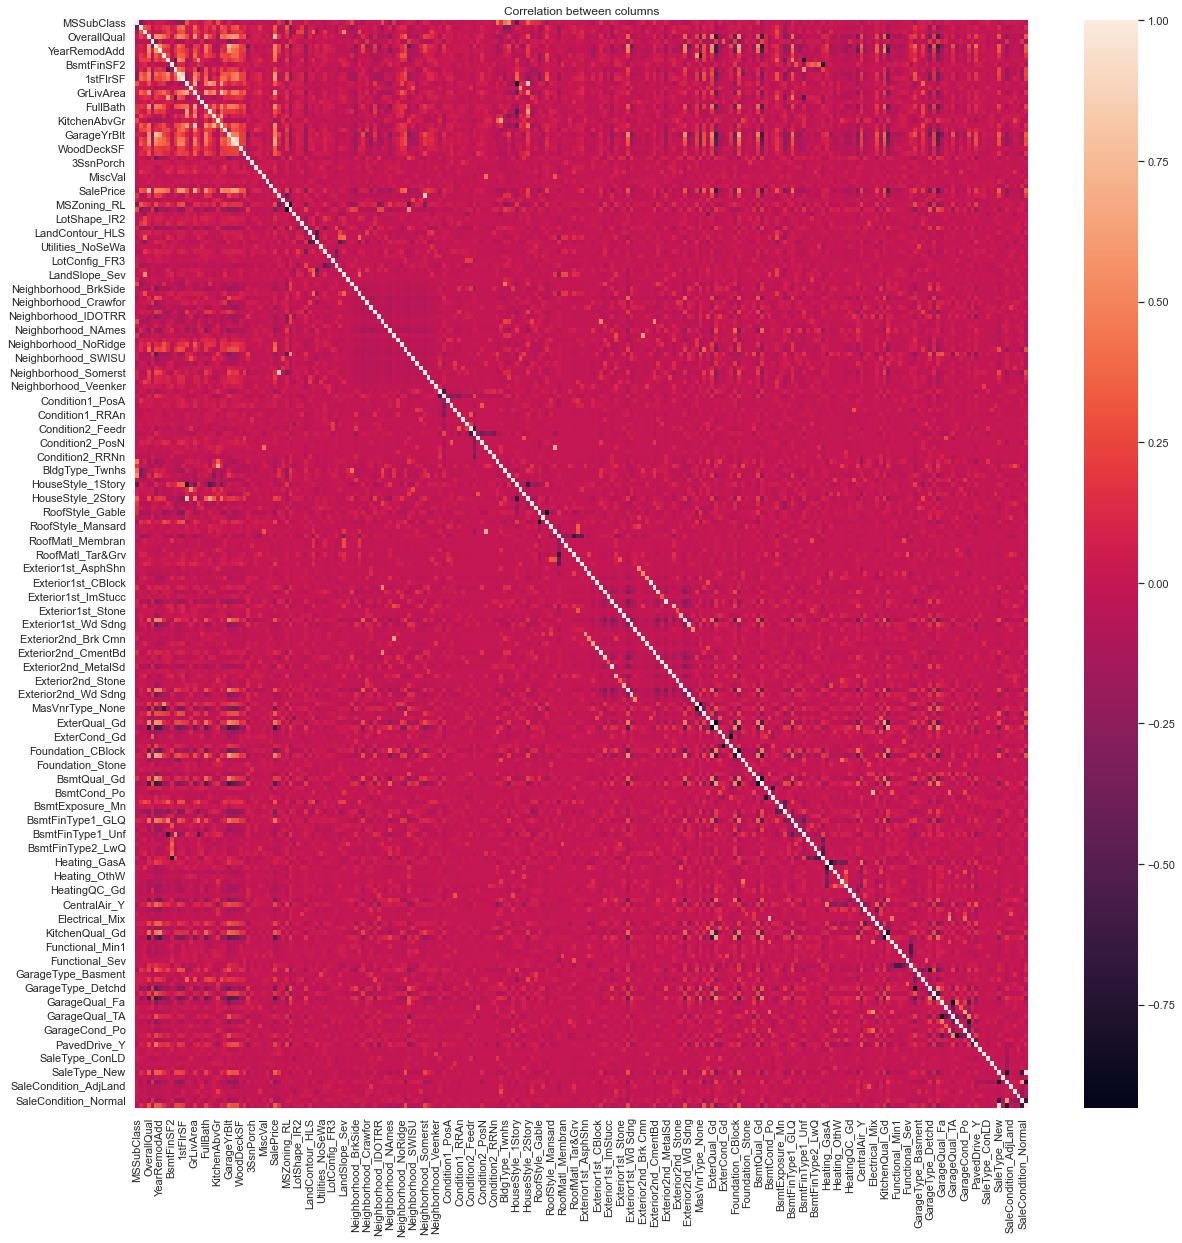

In [17]:
plt.figure(figsize=(20,20))
plt.title('Correlation between columns')
sns.heatmap(train_df.corr())

## Conclusion
- SalePrice is high correlated to OverallQual, GrLivArea features

In [18]:
test_df['Heating'].value_counts()

GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64

In [19]:
test_df = clean_data(test_df, test=True)
test_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Unf,GarageQual_TA,GarageCond_Fa,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Family,SaleCondition_Normal
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,1,0,1,0,1,0,1,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,1,0,1,0,1,0,1,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,1,0,1,0,1,0,1,0,1
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,1,0,1,0,1,0,1,0,1
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,1,1,0,1,0,1,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,1,1,0,1,0,1,0,1,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,1,1,0,1,0,1,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,1,1,0,1,0,1,0,1,0,1


In [20]:
cols_to_del_4 = set(train_df.columns)
cols_to_del_4 = cols_to_del_4.difference(test_df.columns)
cols_to_del_4.remove('SalePrice')
train_df.drop(columns=cols_to_del_4, inplace=True, axis=1)
train_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_Unf,GarageQual_TA,GarageCond_Fa,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Family,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,1,0,1,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,1,0,1,0,1,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,1,0,1,0,1,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,1,0,1,0,1,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,1,0,1,0,1,0,1,0,1
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,1,0,1,0,1,0,1,0,1
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,1,0,1,0,1,0,1,0,1
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,1,0,1,0,1,0,1,0,1


In [21]:
X = train_df.drop(columns=['SalePrice'], axis=1)
Y = train_df['SalePrice']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=21)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1168, 149), (292, 149), (1168,), (292,))

In [24]:
scores_array = []

In [25]:
model_lin_reg = make_pipeline(MinMaxScaler(), LinearRegression())
model_lin_reg.fit(X_train, Y_train)
Y_train_pred = model_lin_reg.predict(X_train)
Y_val_pred = model_lin_reg.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.12768499155314703
RMSLE test: 0.14915900991572478


In [26]:
from sklearn.linear_model import ElasticNet

In [27]:
model_elastic = make_pipeline(MinMaxScaler(), ElasticNet())
model_elastic.fit(X_train, Y_train)
Y_train_pred = model_elastic.predict(X_train)
Y_val_pred = model_elastic.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.23755166934039829
RMSLE test: 0.2469541921531442


In [28]:
from sklearn.svm import SVR

In [29]:
model_svr = make_pipeline(MinMaxScaler(), SVR())
model_svr.fit(X_train, Y_train)
Y_train_pred = model_svr.predict(X_train)
Y_val_pred = model_svr.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.3967508770840098
RMSLE test: 0.40992054581848236


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model_rfr = make_pipeline(MinMaxScaler(), RandomForestRegressor(max_depth=5))
model_rfr.fit(X_train, Y_train)
Y_train_pred = model_rfr.predict(X_train)
Y_val_pred = model_rfr.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.14171901120066926
RMSLE test: 0.1736638920871028


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
model_gbr = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(max_depth=5))
model_gbr.fit(X_train, Y_train)
Y_train_pred = model_gbr.predict(X_train)
Y_val_pred = model_gbr.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.044042064978970376
RMSLE test: 0.139837045586046


In [34]:
from sklearn.ensemble import AdaBoostRegressor

In [35]:
model_abr = make_pipeline(MinMaxScaler(), AdaBoostRegressor(n_estimators=100))
model_abr.fit(X_train, Y_train)
Y_train_pred = model_abr.predict(X_train)
Y_val_pred = model_abr.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.18070381307238337
RMSLE test: 0.2099725216104044


In [36]:
import xgboost as xg

In [37]:
model_xg = make_pipeline(MinMaxScaler(), xg.XGBRFRegressor())
model_xg.fit(X_train, Y_train)
Y_train_pred = model_xg.predict(X_train)
Y_val_pred = model_xg.predict(X_val)
scores_array.append(np.sqrt(mean_squared_log_error(Y_val, Y_val_pred)))
print(f"RMSLE train: {np.sqrt(mean_squared_log_error(Y_train, Y_train_pred))}")
print(f"RMSLE test: {np.sqrt(mean_squared_log_error(Y_val, Y_val_pred))}")

RMSLE train: 0.12194010317528915
RMSLE test: 0.16784779681804038


In [38]:
scores = pd.Series(data=scores_array, index=['LinearRegression', 'ElasticNet', 'SVR', 'RandomForestRegressor', 'GradientBoostingRegressor', 'GradientBoostingRegressor', 'XGBRFRegressor'])
scores.sort_values(ascending=True)

GradientBoostingRegressor    0.139837
LinearRegression             0.149159
XGBRFRegressor               0.167848
RandomForestRegressor        0.173664
GradientBoostingRegressor    0.209973
ElasticNet                   0.246954
SVR                          0.409921
dtype: float64

In [39]:
for col in test_df.columns:
    if test_df[col].isna().sum() != 0:
        print(col)

In [40]:
res = model_gbr.predict(test_df)
res

array([124712.39621646, 152806.55730479, 194184.47310169, ...,
       174559.04015513, 120232.07656213, 231830.03575019])

In [41]:
final_df = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice': res})
final_df.to_csv('submission.csv', sep=',', index=False)